# Pre-processing sequences

In this notebook we illustrate how to use utility functions implemented in the **utils.py** file to pre-process the sequences.

These functions allow to transform a list of sequences (that are available in the **datachallenge-traindata.csv** file into matrices that can be used by machine-/deep-learning algorithms.
More precisely, three types of matrices can be built:
* one-hot encoding matrices, as already seen in the TP8 (exercice about CNNs and one-hot encoding) 
* matrices of kmers tokens, as already seen in TP8 (exercice and CNNs and embeddings)
* matrices of kmers profiles, which is equivalent to the well known "bag of words" representation in text analysis.

You can refer to the last course and to the TP8 for more details.


## We first import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# generic imports 
import pandas as pd
import numpy as np
# seaborn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# utility functions
import utils

## 1. Load train dataset

In [3]:
train_file = "../dataset/datachallenge-traindata.csv"
df_train = pd.read_csv(train_file, sep = ';')
df_train

,idx,label,seq
0,0,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
1,1,R,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
2,2,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
3,3,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
4,4,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
...,...,...,...
2986,2986,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
2987,2987,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
2988,2988,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...
2989,2989,S,ATGTCTCCGATCGAGCCCGCGGCGTCTGCGATCTTCGGACCGCGGC...


### Extract sequences

In [4]:
# extract sequences
seqs = df_train["seq"].values

In [5]:
# print minimum and maximum sequence length
seq_len = [len(x) for x in seqs]
print("minimum / maximum sequence length = {} / {}".format(np.min(seq_len),np.max(seq_len)))

minimum / maximum sequence length = 2043 / 2701


<AxesSubplot:ylabel='Count'>

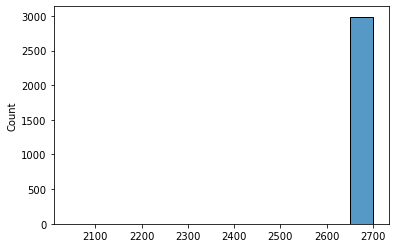

In [6]:
# show histogram
sns.histplot(x=seq_len)

<AxesSubplot:>

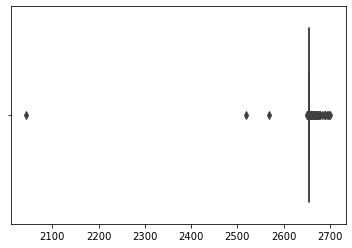

In [16]:
sns.boxplot(x = seq_len)

## 2. Representing sequences using "one-hot-encoding" of ATGC bases

Note that we can choose to **padd** short sequences to reach the maximum sequence length, or **truncate** long sequences to reach the minimum sequence length.

In [7]:
X = utils.build_onehot_matrix(seqs, padd = True, truncate = False)
print(X.shape)

(2991, 2701, 4)


In [8]:
X = utils.build_onehot_matrix(seqs, padd = False, truncate = True)
print(X.shape)

(2991, 2043, 4)


## 3. Representing sequences as vectors of  kmers tokens / indices

We first build a dictionary associating an index to each kmer. Note that we will only consider kmers made of A, T, G and C's only.

In [9]:
k = 7
kmer_dic = utils.build_kmer_dic(seqs, k)

found 4828 distinct k-mers out of 16384 possible


We then extract a matrix containing sequences of kmer indices. Note that here also, we need to choose wheter we want to **padd** short sequences, or **truncate** long sequences.

In [10]:
X = utils.build_kmer_tokens_matrix(seqs, k, kmer_dic, padd = True, truncate = False)
print(X.shape)

(2991, 2695)


In [11]:
X = utils.build_kmer_tokens_matrix(seqs, k, kmer_dic, padd = False, truncate = True)
print(X.shape)

(2991, 2037)


We can then check that the values contained in the matrix are comprised between zero and the number of kmers found in the dictionary.

In [12]:
print("min/max value in X = {}/{} and number of kmers of the dictionary = {}".format(np.min(X), np.max(X), len(kmer_dic)))

min/max value in X = 0/4828 and number of kmers of the dictionary = 4828


## 4. Representing sequences as kmer profiles - vectors counting kmers occurences

Likewise, we first need to build a dictionary associating an index to each kmer. Note that we will only consider kmers made of A, T, G and C's only.

In [13]:
k = 7
kmer_dic = utils.build_kmer_dic(seqs, k)

found 4828 distinct k-mers out of 16384 possible


We then extract a matrix containing kmer profiles. Each column of the matrix will correspond to a kmer of the dictionary, and will count the number of occurences of this kmer in the sequences.

Note that here we don't need to to padd or truncate sequences.

In [14]:
X = utils.build_kmer_profile_matrix(seqs, k, kmer_dic)
print(X.shape)

	- kmerizing sequence 1 out of 2991
	- kmerizing sequence 101 out of 2991
	- kmerizing sequence 201 out of 2991
	- kmerizing sequence 301 out of 2991
	- kmerizing sequence 401 out of 2991
	- kmerizing sequence 501 out of 2991
	- kmerizing sequence 601 out of 2991
	- kmerizing sequence 701 out of 2991
	- kmerizing sequence 801 out of 2991
	- kmerizing sequence 901 out of 2991
	- kmerizing sequence 1001 out of 2991
	- kmerizing sequence 1101 out of 2991
	- kmerizing sequence 1201 out of 2991
	- kmerizing sequence 1301 out of 2991
	- kmerizing sequence 1401 out of 2991
	- kmerizing sequence 1501 out of 2991
	- kmerizing sequence 1601 out of 2991
	- kmerizing sequence 1701 out of 2991
	- kmerizing sequence 1801 out of 2991
	- kmerizing sequence 1901 out of 2991
	- kmerizing sequence 2001 out of 2991
	- kmerizing sequence 2101 out of 2991
	- kmerizing sequence 2201 out of 2991
	- kmerizing sequence 2301 out of 2991
	- kmerizing sequence 2401 out of 2991
	- kmerizing sequence 2501 out of 299

In [15]:
print("number of columns of X = {} and number of kmers of the dictionary = {}".format(X.shape[1], len(kmer_dic)))
print("min/max value in X = {}/{} ".format(np.min(X), np.max(X)))

number of columns of X = 4828 and number of kmers of the dictionary = 4828
min/max value in X = 0/5 
